# IDS - Lecture 3
## JSON, Network and APIs

## Today's agenda
* A solution to last week's homework
* Tuples and optional input arguments for functions
* Networking
* JSON (JavaScript Object Notation)
* Web APIs (HTTP GET)

### Learning goals today
* Stronger Python skills
* Somewhat of an understanding of how to get data from HTTP connection.
* Storing and handling JSON in files!


* Dip your feet in HTTP get requests
* handling JSON files (local and through end-point)
* Plenty of exercises!

### Hand in
* Groups of 2-6
* Hand in on 16/3
* Combine techniques of UDP, HTTP and CLI (Next time)
* Max 4 pages of text describing your program and the elements you used.
* This hand-in is the first part of the final mini project needed for the IDS exam.
* One full lab day

## A solution to last week's homework

```python
import threading
import socket

UDP_IP = "127.0.0.1"
UDP_PORT = 6565

sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)  # UDP
sock.bind((UDP_IP, UDP_PORT))


def listen_to_udp():
    while True:
        data, addr = sock.recvfrom(1024)  # buffer size is 1024 bytes
        print(f'\nIncoming message: {data.decode("utf-8")}')


def listen_to_input():
    while True:
        message = input('Chat input: ')
        sock.sendto(bytes(str(message), encoding='utf8'), (UDP_IP, 6566))


if __name__ == "__main__":
    t1 = threading.Thread(target=listen_to_input, args=())
    t2 = threading.Thread(target=listen_to_udp, args=())

    t1.start()
    t2.start()
```

### Fast hack for killing processes locking up a specific port
On macOS we can open the terminal and input the following command. Replace _PORT_NUMBER_ with the port number.
```
sudo lsof -i :PORT_NUMBER
```
If a process is found, we can use the the process identifier (pid).
```
COMMAND     PID                USER   FD   TYPE             DEVICE SIZE/OFF NODE NAME
python3.8 65683 frederikjuutilainen    3u  IPv4 0x27c268ecd189636d      0t0  UDP localhost:6565
```

Note the PID and input it in the following command:
```
kill -9 <PID>
```

### Same process on Windows
Found on [stackoverflow](https://stackoverflow.com/a/39633428).

1. Open cmd.exe
2. Insert ```netstat -ano | findstr :<PORT>```
3. Locate the PID and insert in ```taskkill /PID <PID> /F```

## More Python knowledge!
Tuples and optional input arguments to functions!

_Alot of the concepts presented here can also be found in [Automate The Boring Stuff](https://automatetheboringstuff.com/chapter4/)_

### Tuples!
A _tuple_ is a type of data in Python, which is very similar to lists. Instead of using square brackets ```[]```, we used parentheses ```()``` when creating a tuple.
```python
test = (5, 0, 2)
hello = ('Cool String', 0.01, 25, [2,2]) # can hold different kinds of data types
```

Unlike lists, tuples are **immutable**. This means that their values cannot be modified, appended or removed.

In [14]:
test = (5, 0, 2)
test[0] = 1 # will throw a TypeError

TypeError: 'tuple' object does not support item assignment

If we wish to do so, we can convert tuples to lists and vice versa.
```python
tuple([2,5,2]) # convert list to tuple
list(('one string', 'two string')) # convert tuple to list
```

#### When to use tuples?
When we want data to not be mutable and when it makes sense to structure data this way. An example could be first and last name:
```python
full_name = ('Frederik', 'Juutilainen')
print(f'My last name is {full_name[1]}')
```
or coordinates:

In [15]:
ruc_coordinates = (55.65315552816671, 12.14078009885621) # lat, lon
norrebro_coordinates = (55.69442365844815, 12.548895741456962) # lat, lon

In [16]:
import geopy.distance # pip3 install geopy
dist = geopy.distance.distance(ruc_coordinates, norrebro_coordinates).km
print(f'Distance from RUC to Nørrebro is {dist:.1f} km')

Distance from RUC to Nørrebro is 26.1 km


Mental exercises! Can you think of other forms of data or information that would represented well with a tuple?

### Optional input parameters and method overloading
_Tons of good points and examples to be found in [Automate the Boring stuff](https://automatetheboringstuff.com/2e/chapter3/)_

In Java, arguments to functions are defined by their position in the function call.

```java
public static void printGreeting(String firstName, String lastName){
    System.out.print("Hello " + firstName + " " + lastName);
}
```

This is often also the case in Python, as we can remember with e.g. the ```random.randint(1,5)```-function. Here the first argument $1$ is the lower end of the range while $5$ is the upper end. We can however also use _keyword arguments_ and these are typically used when working with optional parameters.

If we wanted the previous JAVA example to work with either only firstName or first and last name, we would have to overload the function.

```java
public static void printGreeting(String firstName){
    System.out.print("Hello " + firstName);
}

public static void printGreeting(String firstName, String lastName){
    System.out.print("Hello " + firstName + " " + lastName);
}
```

#### Using optional input parameters in Python
An example of using an optional input parameter can be found in the ```print()```-function, were we can use the ```end```-keyword argument to decide what follows a string.

```
Print objects to the text stream file, separated by sep and followed by end. sep, end, file and flush, if present, must be given as keyword arguments.
```
_[Python3 "print()"-documentation](https://docs.python.org/3/library/functions.html#print)_

In [17]:
print('Hello', end='')
print('World')

HelloWorld


##### Creating a function with an optional input parameter

In [18]:
def printGreeting(name, professor=False):
    if professor:
        name = 'Dr. ' + name
    print(f'Hello {name}!')
printGreeting('Frederik')
printGreeting('Henning', professor=True)

Hello Frederik!
Hello Dr. Henning!


This allows us to avoid writing many versions of the "same" function, but handle the logic internally within a function.

### Exercise!
* Write a function which returns a list of all numbers from 1 to 25. The function should have the optional input argument ```omit```, which is a tuple of numbers that should not appear in the returned list.
* Bonus: make sure the function does not crash if the ```omit```-parameter is not a tuple.

## Networking
Last time we worked with sending messages over a local network. We showed this internally using [localhost](https://en.wikipedia.org/wiki/Localhost) ```127.0.0.1```, but this could also have been done to other devices visible on the network and using their IP address instead.

Show example of sending UDP message from TouchOSC on iOS to Python script.

### Examples of UDP messaging in Interaction Design
![alt text](images/thewave.png "The Wave - Light installation")
_The Wave (Photo credit: Paul Grover for The Telegraph)_

MS Teams (aka this lecture) also uses UDP messaging! By using network programming we are able to have different interactive systems or programs communicate with one another.

### The Internet
![alt text](images/internet.png "The Internet")

### _Ping_ and _traceroute_

> Ping is a computer network administration software utility used to test the reachability of a host on an Internet Protocol (IP) network.
>
> --Source: ping (networking utility) ([wikipedia](https://en.wikipedia.org/wiki/Ping_(networking_utility)\)))

> In computing, traceroute and tracert are computer network diagnostic commands for displaying possible routes (paths) and measuring transit delays of packets across an Internet Protocol (IP) network.
> 
> -- Source: traceroute ([wikipedia](https://en.wikipedia.org/wiki/Traceroute))


Ping RUC.dk

Tracrroute sends test packets of data to a destination address and records each router on it's journey.

Example output ```traceroute ruc.dk```:
```
traceroute to ruc.dk (130.225.221.44), 64 hops max, 52 byte packets
 1  192.168.1.1 (192.168.1.1)  1.792 ms  1.247 ms  1.102 ms
 2  <MY-IP-ADDRESS> (10.128.184.225)  1.753 ms  1.708 ms  1.618 ms
 3  172.29.0.129 (172.29.0.129)  1.636 ms  1.931 ms  1.453 ms
 4  172.28.8.115 (172.28.8.115)  2.036 ms  3.755 ms  1.982 ms
 5  172.28.2.1 (172.28.2.1)  1.943 ms  2.762 ms  2.041 ms
 6  as197301.parknet.dk (80.71.139.183)  2.941 ms  2.906 ms  2.775 ms
 7  * * *
 8  et-7-0-2-0.taas1cr2dk.gc-net.eu (212.98.68.114)  3.449 ms  3.897 ms  3.069 ms
 9  212.98.127.19 (212.98.127.19)  2.759 ms  3.050 ms  3.074 ms
10  ae7-0.ball1p1dk.gc-net.eu (194.182.97.98)  3.856 ms  3.724 ms  3.274 ms
11  77.243.32.60 (77.243.32.60)  3.642 ms  3.845 ms  3.465 ms
12  dk-bal2.nordu.net (109.105.98.252)  19.734 ms  3.517 ms  3.617 ms
13  dk-ore.nordu.net (109.105.98.117)  4.513 ms  4.587 ms  4.601 ms
14  ore.core.fsknet.dk (109.105.102.161)  4.173 ms  4.371 ms  5.431 ms
15  10g-ore.ruc.core.fsknet.dk (130.225.244.42)  5.488 ms  5.673 ms  5.640 ms
16  130.226.173.66 (130.226.173.66)  9.198 ms  12.771 ms  7.789 ms
```

## JSON

https://raw.githubusercontent.com/lutangar/cities.json/master/cities.json

* JSON ("Jay-Son") is __J__ava __S__cript __O__bject __N__otation.
* Standard file format used to store and trasmit data.
* Human-readable
* Derived from JavaScript but now language independent.
* Encoded in [UTF-8](https://en.wikipedia.org/wiki/UTF-8#Examples)

In [19]:
{
  "data": [{
    "type": "articles",
    "working": false,
    "attributes": {
      "title": "JSON:API paints my bikeshed!",
      "body": "The shortest article. Ever."
    }
  }],
  "included": [
    {
      "type": "people",
      "id": 42,
      "attributes": {
        "name": "John"
      }
    }
  ]
};

NameError: name 'false' is not defined

### JSON datatypes
_Source: [wikipedia](https://en.wikipedia.org/wiki/JSON#Syntax)_

* Number: no distinction between integer and floating-point.
* String: a sequence of zero or more Unicode characters. ```"text"```
* Boolean: either of the values ```true``` or ```false```
* Array: an ordered list of zero or more values, each of which may be of any type. ```[1,2, "test"]```
* Object: a collection of name–value pairs where the names (also called keys) are strings. Objects are intended to represent associative arrays,[2] where each key is unique within an object.
* ```null```: an empty value, using the word null

* Number: a signed decimal number that may contain a fractional part and may use exponential E notation, but cannot include non-numbers such as NaN. The format makes no distinction between integer and floating-point.
* String: a sequence of zero or more Unicode characters. Strings are delimited with double-quotation marks and support a backslash escaping syntax.
* Boolean: either of the values ```true``` or ```false```
* Array: an ordered list of zero or more values, each of which may be of any type. Arrays use square bracket notation with comma-separated elements.
* Object: a collection of name–value pairs where the names (also called keys) are strings. Objects are intended to represent associative arrays,[2] where each key is unique within an object.

### Working with JSON in Python
JSON as inline String

In [20]:
import json

# some JSON:
x =  '{ "name":"Frederik", "city":"Copenhagen", "Number of toes": "10"}' # JSON as string

# parse x:
y = json.loads(x) # as dict

# the result is a Python dictionary:
print(y["city"]) 

Copenhagen


We can work with Jupyter code cells in VS Code. [link](https://code.visualstudio.com/docs/python/jupyter-support)

This allows us to e.g. execute code cells and inspect variables. You can start code cells by inserting ```#%%%``` and executing each cells by pressing ```cmd + enter ``` (macOS) or ```ctrl + enter``` (Windows).

```python
#%%
print('Hello, World')
```

#### Demo!

Notebooks are extremely useful for developing, debugging and communicating data.

### Loading and saving from JSON from file

In [21]:
# importing the module 
import json 
import geopy.distance  
    
# Opening JSON file 
# cities.json download from https://github.com/lutangar/cities.json/blob/master/cities.json or moodle
with open('data/cities.json') as json_file: 
    cities = json.load(json_file)
    
# saving to JSON
#with open('data/output.json', 'w') as file_out:
#    json.dump(cities , file_out)

### JSON exercises
_Using [cities dataset](https://github.com/lutangar/cities.json)_ (can also be found on moodle)
* Make a list of cities in Sweden (SE) and [sort by name](https://stackoverflow.com/a/73050).
* Make a list of cities that end in "ville" and sort by country code.
* Make a list of all cities closer than 500 km to Paris (FR) and insert distance to Paris in each dict.
    * Tip 1: use the calculate distance method from earlier in the slides
    * Tip 2: experiment on sliced subset e.g. ```cities[:50]``` to save time
    * You should get 13580 cities including Paris it self
* Find the city that's the furthest away from Banket (Zimbabwe / ```ZW```).
    * Result should be "Leilani Estates"
    
__Remember to save your solutions!__

## Web APIs
* What is an API?
* What is a web API?
* HTTP request
* HTTP request in Python

An application programming interface (API), is a computing interface that defines interactions between multiple software components.

A web API is an interface which has one or more endpoints - usually accessed through HTTP.

### HTTP requests
> HTTP defines a set of request methods to indicate the desired action to be performed for a given resource. Although they can also be nouns, these request methods are sometimes referred to as HTTP verbs.
> 
> -- <cite>[Mozilla](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods)</cite>

Some common HTTP requests include:
###### GET
The GET method requests a representation of the specified resource. Requests using GET should only retrieve data.
######  POST
The POST method is used to submit an entity to the specified resource, often causing a change in state or side effects on the server.
###### PUT
The PUT method replaces all current representations of the target resource with the request payload.
###### DELETE
The DELETE method deletes the specified resource.

If we want to access information stored on the internet, the [Requests](https://requests.readthedocs.io/en/master/)-module allows us to do that easily.

### HTTP request in python

In [24]:
import requests
# getting HTML
r = requests.get('https://ruc.dk/')
r.text; # HTML code

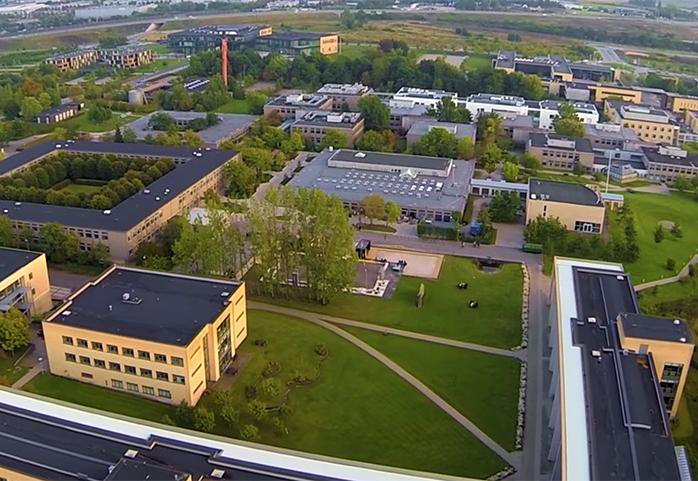

In [27]:
# Reading image
from PIL import Image # pip3 install Pillow

url = 'https://ruc.dk/sites/default/files/styles/footer_map_image/public/2020-12/campus_overview.jpg?itok=D26B1wen'
im = Image.open(requests.get(url, stream=True).raw)
im

### HTTP requests on API
1. Find API
2. Read documentation
3. Create user with authentication (a must in some cases)
4. HTTP requests using ```requests```

#### Example - Weather
https://www.metaweather.com/api/

##### Location Search
**URL** ```/api/location/search/?query=(query)``` or ```/api/location/search/?lattlong=(latt),(long)```

**Arguments** Either query or lattlong need to be present.

**query** Text to search for.

**latlong** Coordinates to search for locations near. Comma separated lattitude and longitude e.g. "36.96,-122.02". 

#### Response Fields
|Field|Type|Unit|Description|
|--- |--- |--- |--- |
|title|string||Name of the location|
|location_type|string|(City|Region / State / Province|Country|Continent)||
|latt_long|floats, comma separated|||
|woeid|integer||Where On Earth ID|
|distance|integer|Metres|Only returned on a lattlong search|


Examples
*   [/api/location/search/?query=san](/api/location/search/?query=san)
*   [/api/location/search/?query=london](/api/location/search/?query=london)
*   [/api/location/search/?lattlong=36.96,-122.02](/api/location/search/?lattlong=36.96,-122.02)
*   [/api/location/search/?lattlong=50.068,-5.316](/api/location/search/?lattlong=50.068,-5.316)

In [ ]:
import requests

ruc_coordinates = (55.65315552816671, 12.14078009885621) # lat, lon

# defining a params dict for the parameters to be sent to the API 
ruc_coordinates = (55.65315552816671, 12.14078009885621) # lat, lon

# format as comma separated lattitude and longitude
ruc_coordinates_formatted = str(ruc_coordinates).strip('(').strip(')')
payload = {'lattlong': ruc_coordinates_formatted}
  
# sending get request and saving the response as response object 
r = requests.get(url = "https://www.metaweather.com/api/location/search/", params = payload) 
  
# extracting data in json format 
response = r.json() 
response

In [ ]:
# sending get request and saving the response as response object 
params = {'query': 'copenhagen'}
r = requests.get(url = "https://www.metaweather.com/api/location/search/", params = params) 
  
# extracting data in json format 
response = r.json() 

In [ ]:
r = requests.get(url = "https://www.metaweather.com/api/location/" + str(response[0]['woeid'])) 
  
# extracting data in json format 
response = r.json() 
response

### Exercise
1. Find interesting API on https://mixedanalytics.com/blog/list-actually-free-open-no-auth-needed-apis/
2. Get and interpret data using ```requests```and the dictionary and string techniques we have learned
3. _Ideas and examples:_
    * E.g. can you create a dictionary with both coordinates and population size of Boston (US).
    * Find software developer Jobs in Berlin!
    * Make a chat bot that tells jokes
    * Find all countries where they speak Spanish
    * Get Public holidays of all countries ending in A where they speak French